## Import the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Input


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

Load The dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

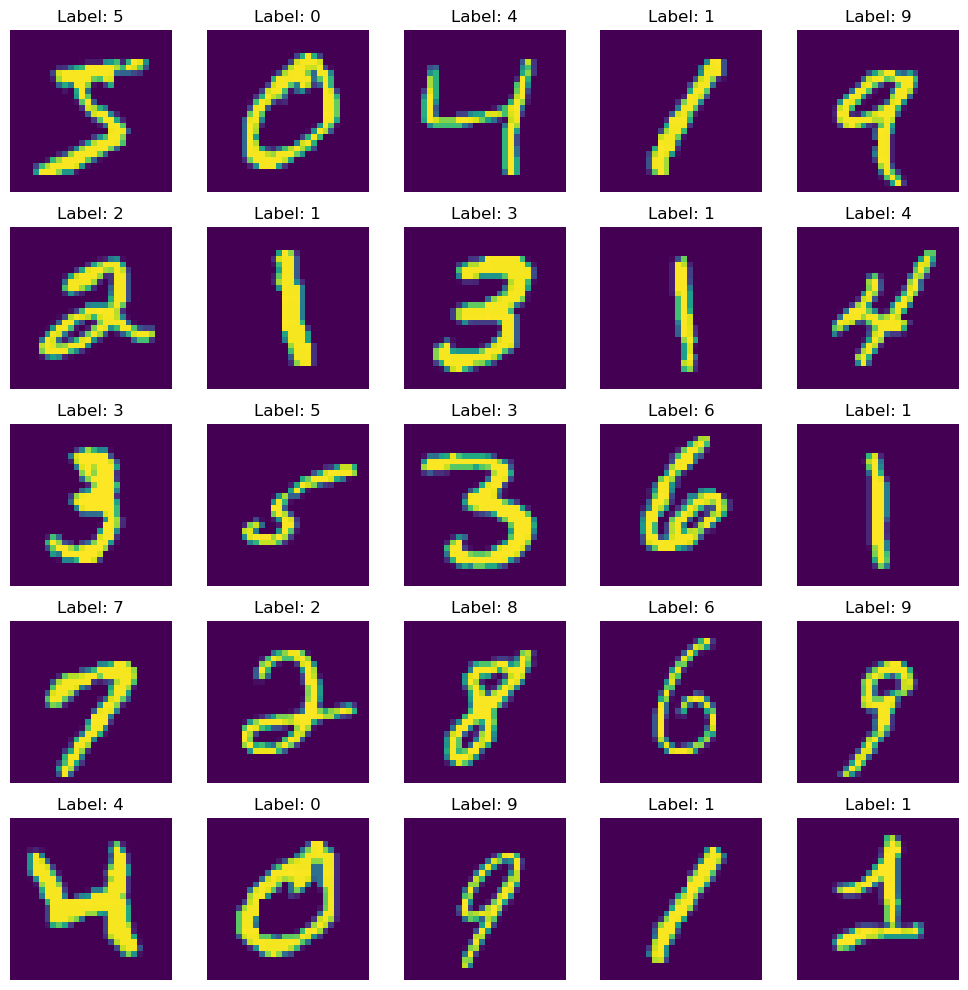

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])  
    ax.set_title(f"Label: {y_train[i]}")  
    ax.axis('off')


plt.tight_layout()
plt.show()

# Explore the Images

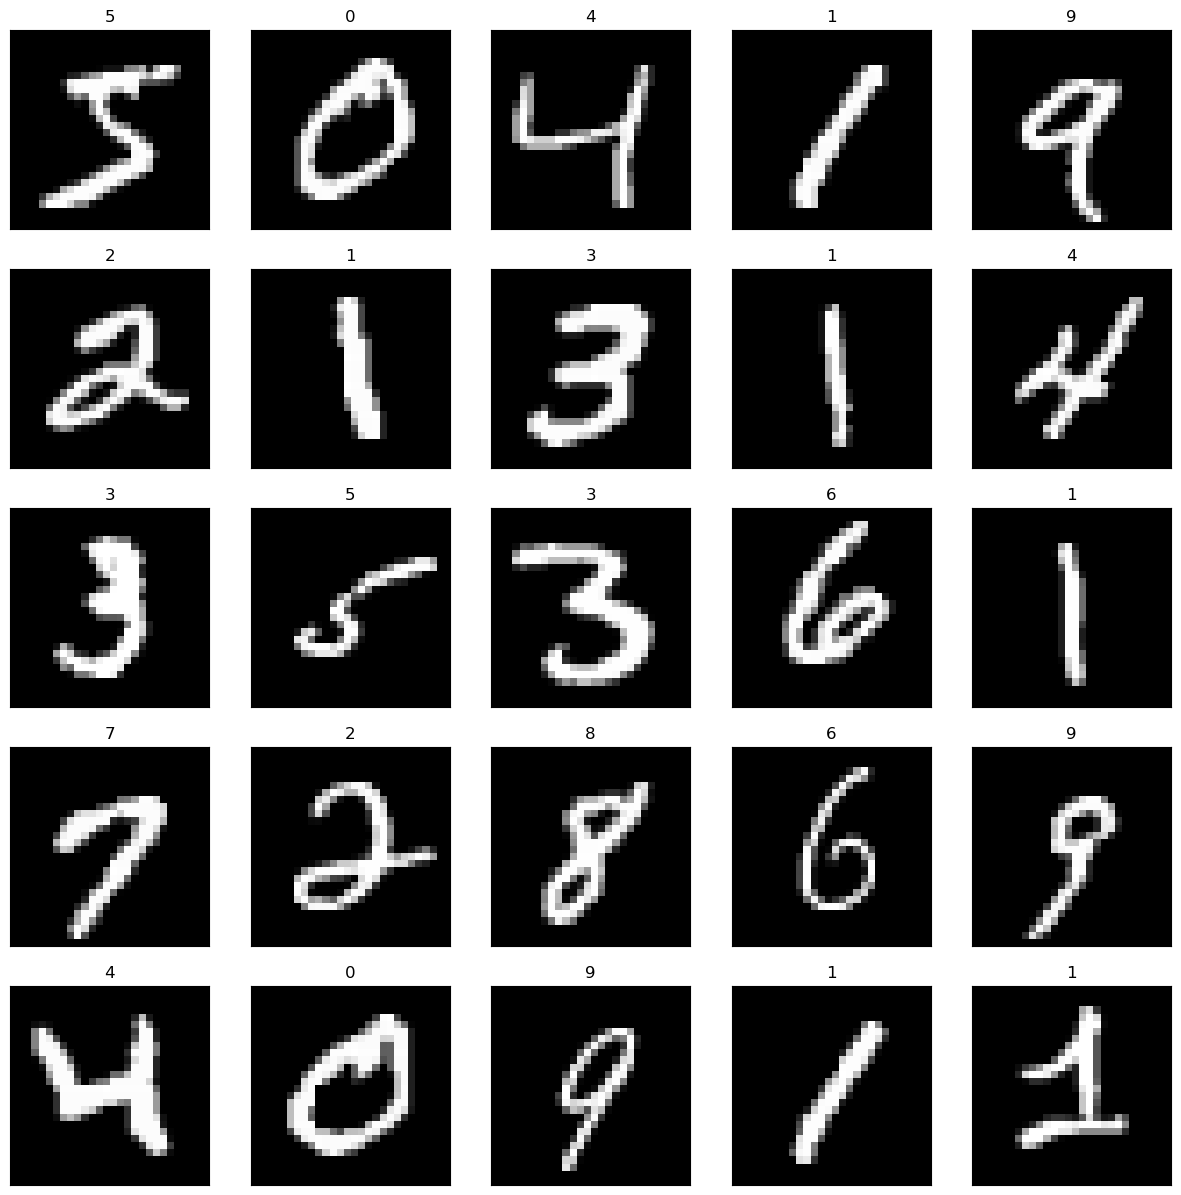

In [8]:
plt.figure(figsize = (15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

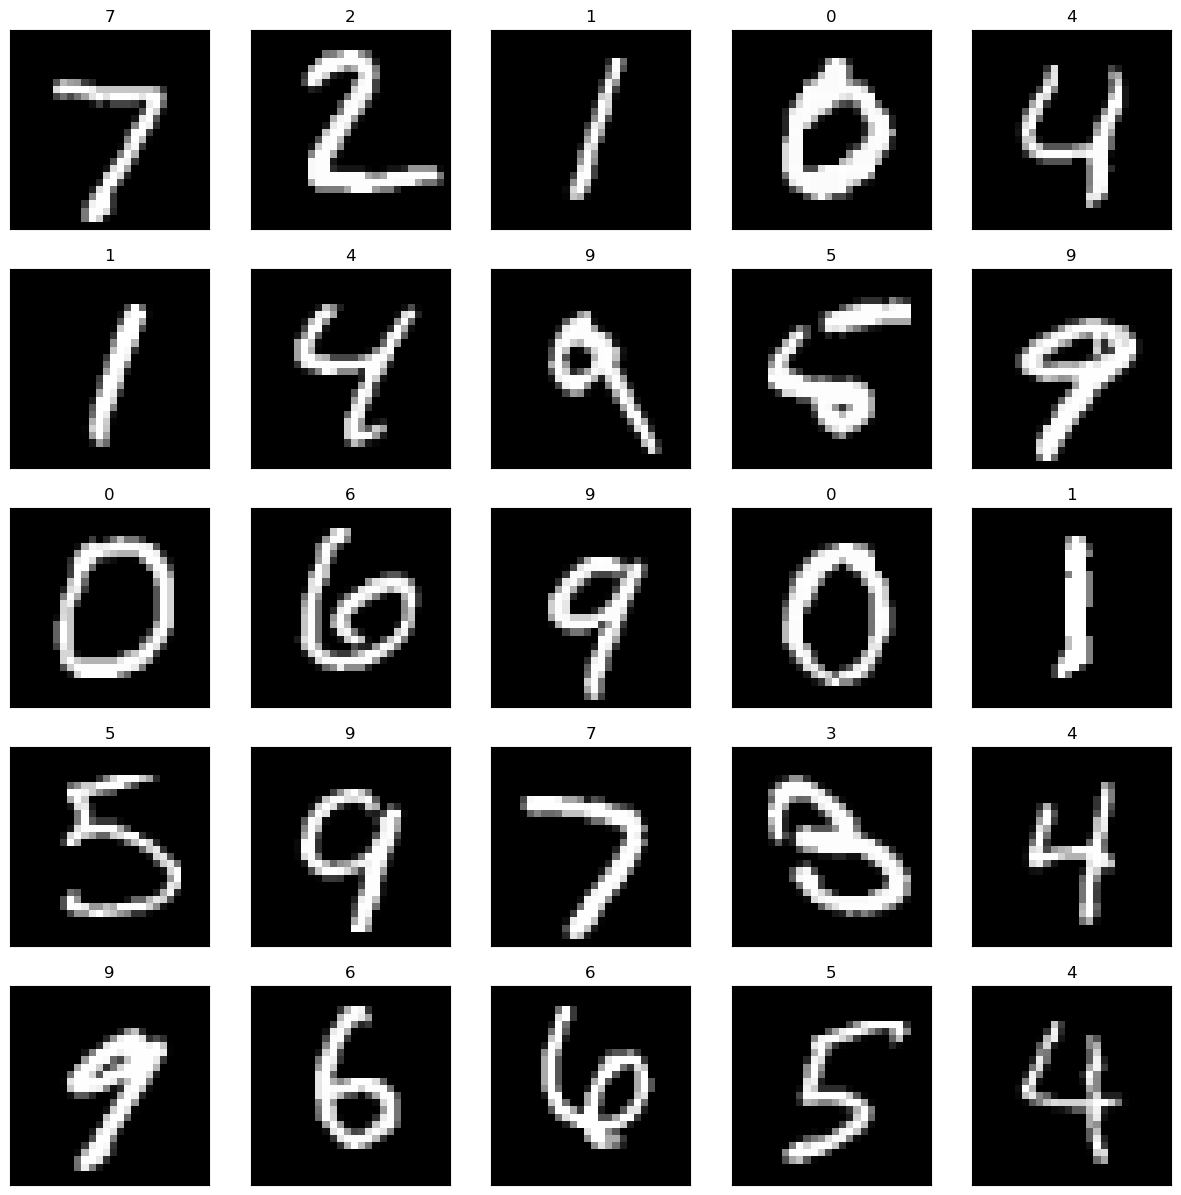

In [9]:
plt.figure(figsize = (15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap = 'gray')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])

# data Preparation

In [11]:
x_train.max(), x_train.min()

(255, 0)

In [12]:
# Normalize

x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [15]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [16]:
y_train_new.shape, y_test_new.shape

((60000, 10), (10000, 10))

# Build the model

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

#Input Layer
model.add(Input(shape = (28, 28, 1)))


#convolution and pooling layers

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())


model.add(Dense(512, activation='relu'))

#hidden Layer
model.add(Dense(256, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))



In [20]:
from tensorflow.keras.utils import plot_model

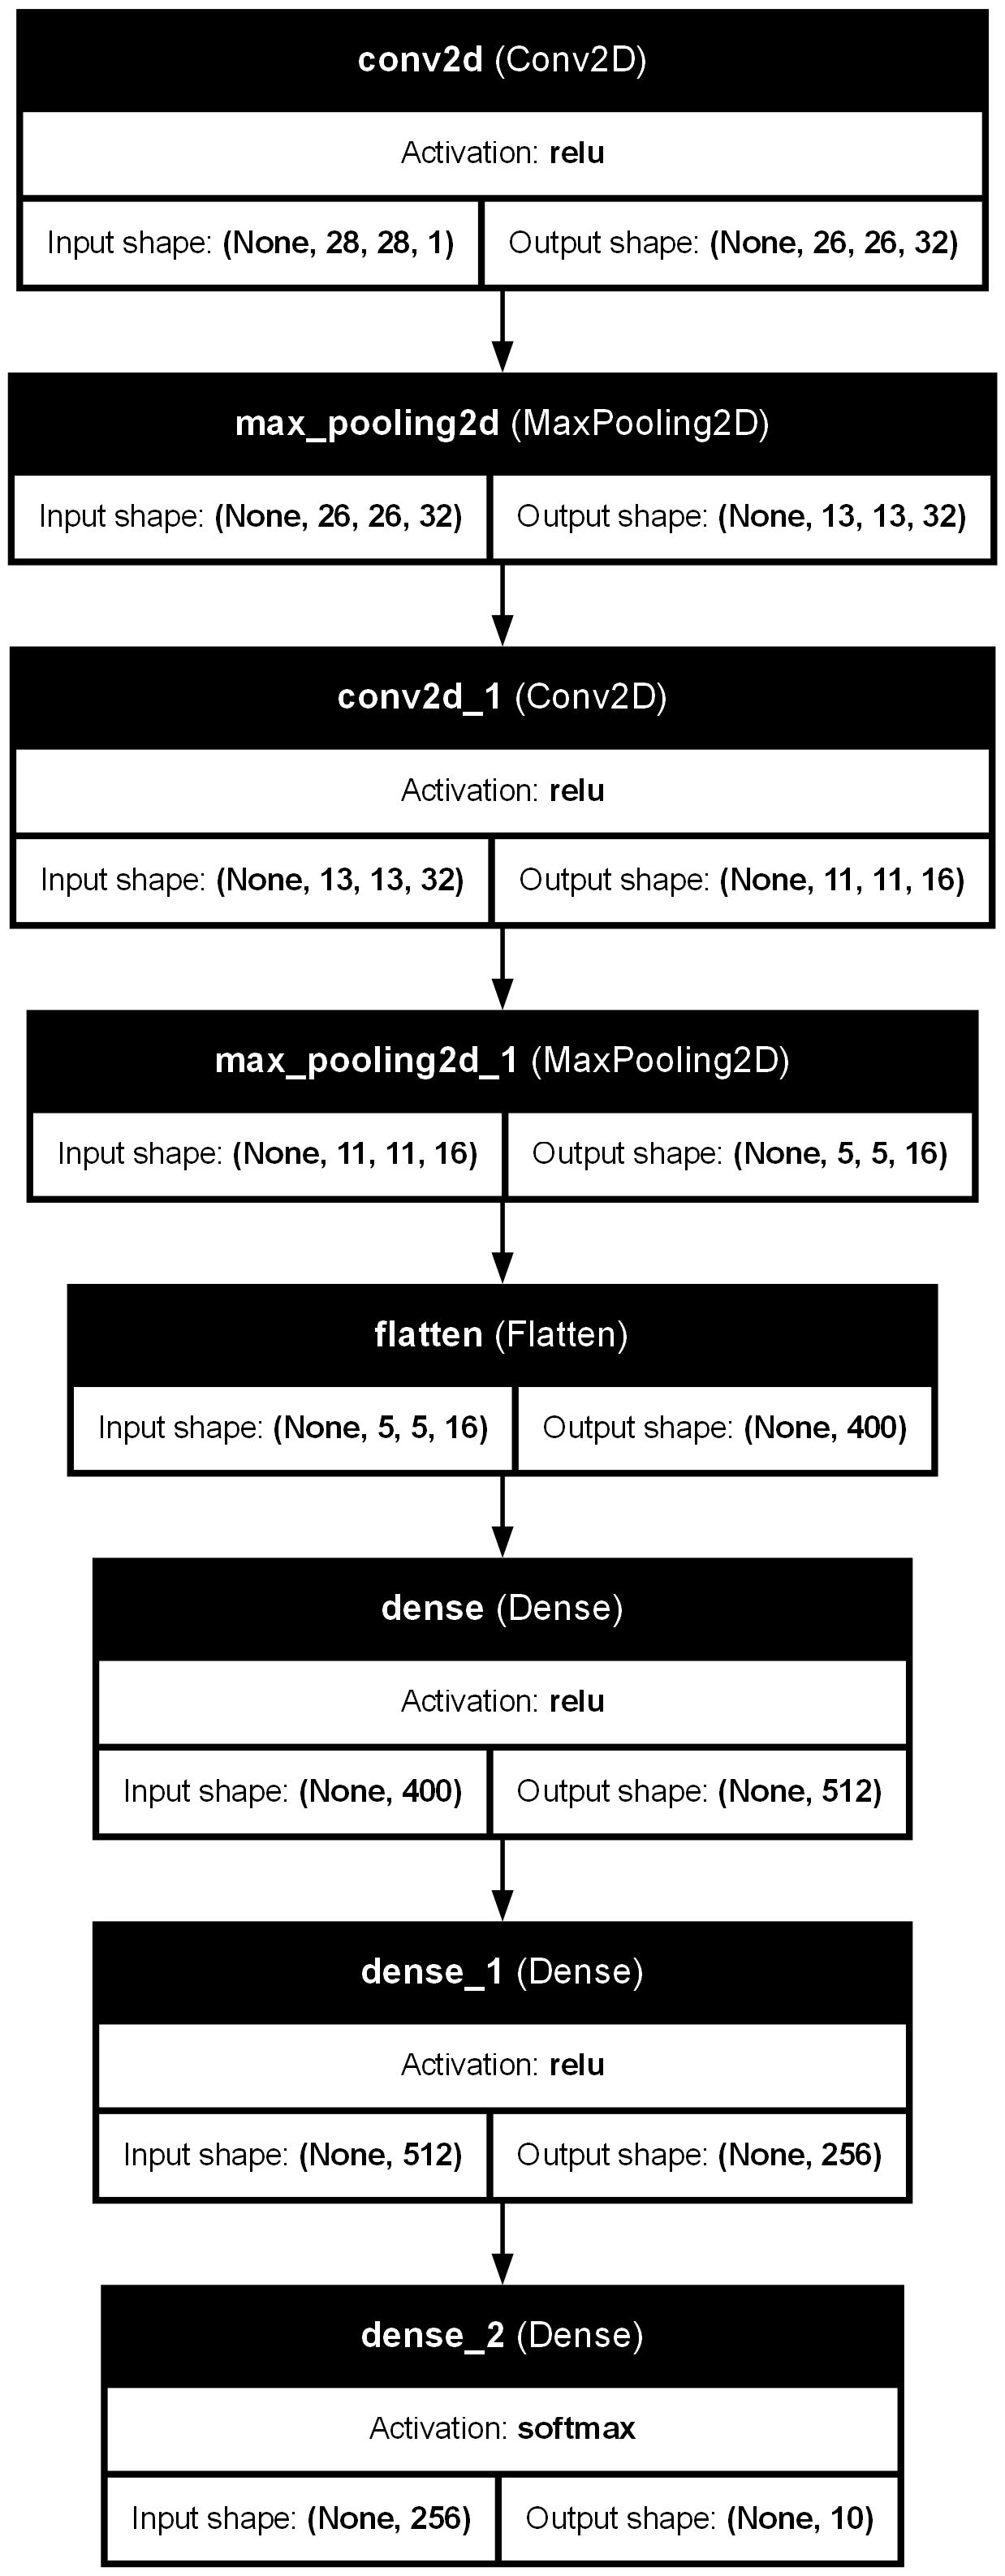

In [21]:
plot_model(model, show_layer_activations= True, show_shapes= True, show_layer_names= True)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 344,154 (1.31 MB)

 Trainable params: 344,154 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# Train the model

In [26]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.9311 - loss: 0.2201
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.9859 - loss: 0.0482
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.9893 - loss: 0.0362
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9924 - loss: 0.0268
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9940 - loss: 0.0206
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9945 - loss: 0.0179
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9954 - loss: 0.0163
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9948 - loss: 0.0173
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9966 - loss: 0.0137
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9960 - loss: 0.0145


## Evaluate the Model

In [28]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9888 - loss: 0.0623


[0.04563646391034126, 0.9908000230789185]

In [29]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

In [30]:
new = x_te[1234]

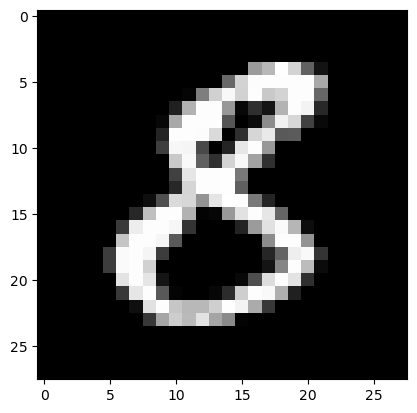

In [31]:
plt.imshow(new, cmap = 'gray')

In [34]:
new.shape

(28, 28)

In [36]:

predictions = model.predict(new.reshape(1,28,28))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [38]:
predictions.argmax()

8

In [40]:
# 2nd method

new = new.reshape(1,28,28)
new = new /255

pred = model.predict(new, verbose = False)
pred.argmax()

8

In [42]:
import cv2


In [44]:
img = cv2.imread('new-char.png', 0)

In [46]:
img.shape

(260, 269)

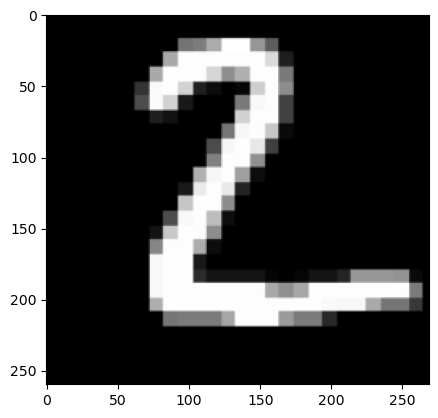

In [78]:
plt.imshow(img, cmap= 'gray')

In [80]:
img_resized = cv2.resize(img, (28, 28))

img_reshaped = img_resized.reshape(1,28,28)
print(img_reshaped.shape)

(1, 28, 28)


In [82]:
img_reshaped.shape

(1, 28, 28)

In [84]:
pred = model.predict(img_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [86]:
pred.argmax()

2

In [88]:
img_new = cv2.imread('new-char1.jpg', 0)

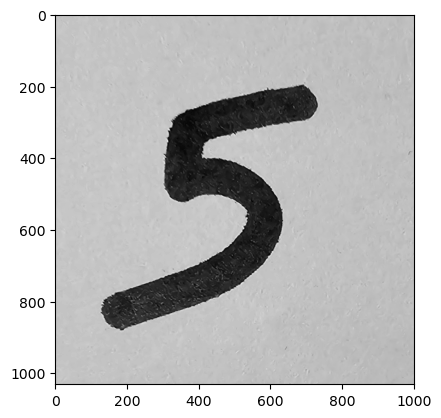

In [90]:
plt.imshow(img_new, cmap = 'gray')

In [92]:
img_new.shape

(1031, 1001)

In [94]:
img_resized = cv2.resize(img_new, (28, 28))

img_reshaped = img_resized.reshape(1,28,28)
print(img_reshaped.shape)

(1, 28, 28)


In [96]:
pred = model.predict(img_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [98]:
pred.argmax()


8

# 2nd Method

In [191]:
thresh, img_thresh = cv2.threshold(img_new, 127,255, cv2.THRESH_BINARY_INV)

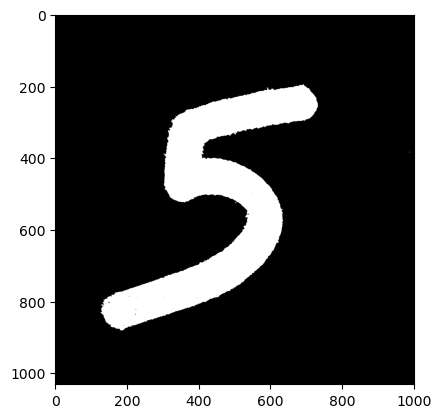

In [193]:
plt.imshow(img_thresh, cmap = 'gray')

In [194]:
img_new1 = cv2.resize(img_thresh, (28,28))

In [197]:
img_reshaped = img_new1.reshape(1,28,28)
print(img_reshaped.shape)

(1, 28, 28)


In [199]:
pred = model.predict(img_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [201]:
pred.argmax()


5